# High ELO Stockfish vs. Low ELO Stockfish

In [8]:
import chess
from stockfish import Stockfish
import pandas as pd
import asyncio

In [ ]:
# STOCKFISH_PATH = r"C:\Users\nafis\Downloads\stockfish-windows-x86-64-avx2\stockfish\stockfish-windows-x86-64-avx2.exe"

HIGH_ELO = 3500
LOW_ELO = 1000

NUM_GAMES = 10

In [ ]:
high_elo_engine = Stockfish()
high_elo_engine.update_engine_parameters({"UCI_LimitStrength": True, "UCI_Elo": HIGH_ELO})

low_elo_engine = Stockfish()
low_elo_engine.update_engine_parameters({"UCI_LimitStrength": True, "UCI_Elo": LOW_ELO})


In [ ]:
high_elo_wins = 0
low_elo_wins = 0
draws = 0

In [10]:
for game_number in range(1, NUM_GAMES + 1):
    print(f"Starting game {game_number}...")
    board = chess.Board()

    while not board.is_game_over():
        # Determine which engine to use based on turn
        current_engine = high_elo_engine if board.turn == chess.WHITE else low_elo_engine

        # Set the position on the board for the engine
        current_engine.set_fen_position(board.fen())

        # Get the best move from the engine
        best_move = current_engine.get_best_move()
        if best_move is None:
            print("Engine failed to provide a move.")
            break

        # Apply the move to the board
        move = chess.Move.from_uci(best_move)
        board.push(move)

    # Record the result of the game
    result = board.result()
    if result == "1-0":
        high_elo_wins += 1
    elif result == "0-1":
        low_elo_wins += 1
    else:
        draws += 1

    print(f"Game {game_number} result: {result}\n")

Starting game 1...
Game 1 result: 1-0

Starting game 2...
Game 2 result: 1-0

Starting game 3...
Game 3 result: 1-0

Starting game 4...
Game 4 result: 1-0

Starting game 5...
Game 5 result: 1-0

Starting game 6...
Game 6 result: 1-0

Starting game 7...
Game 7 result: 1-0

Starting game 8...
Game 8 result: 1-0

Starting game 9...
Game 9 result: 1-0

Starting game 10...
Game 10 result: 1-0



In [11]:
print(f"Final Results after {NUM_GAMES} games:")
print(f"High ELO Wins: {high_elo_wins}")
print(f"Low ELO Wins: {low_elo_wins}")
print(f"Draws: {draws}")


Final Results after 10 games:
High ELO Wins: 10
Low ELO Wins: 0
Draws: 0


In [12]:
with open("elo_match_results.txt", "w") as result_file:
    result_file.write(f"Final Results after {NUM_GAMES} games:\n")
    result_file.write(f"High ELO Wins: {high_elo_wins}\n")
    result_file.write(f"Low ELO Wins: {low_elo_wins}\n")
    result_file.write(f"Draws: {draws}\n")


# High ELO Stockfish vs. High ELO Stockfish

In [9]:
stockfish = Stockfish()
stockfish.update_engine_parameters({"Threads": 8, "Hash": 4096})

In [73]:
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 8,
 'Hash': 4096}

In [74]:
NUM_GAMES = 1000

white_wins = 0
black_wins = 0
draws = 0

In [75]:
results = []

In [76]:
async def get_move_with_timeout(stockfish, timeout=15):
    """
    Run stockfish.get_best_move() in a separate thread and wait for a maximum of `timeout` seconds.
    If the call exceeds the timeout, return None.
    """
    try:
        # Use asyncio.to_thread to run the blocking call in a separate thread.
        move = await asyncio.wait_for(asyncio.to_thread(stockfish.get_best_move), timeout)
        return move
    except asyncio.TimeoutError:
        # move = stockfish.get_best_move_time(1000)
        print(f"Timeout: stockfish.get_best_move() took more than 15 seconds.")
        return None

In [77]:
for game_number in range(1, NUM_GAMES + 1):
    print(f"Starting game {game_number}...")
    move_counter = 0
    board = chess.Board()

    while not board.is_game_over() and move_counter <= 500:
        stockfish.set_fen_position(board.fen())
        move = await get_move_with_timeout(stockfish)
        # print(f"Move: {move}")

        if move is None:
            print("No move received. Reinitializing Stockfish.")
            stockfish = Stockfish(parameters={"Threads": 8, "Hash": 4096})  # Reinitialize Stockfish for the next game.
            break

        board.push_uci(move)
        move_counter += 1

    # Record the result of the game
    result = board.result()
    if result == "1-0":
        white_wins += 1
    elif result == "0-1":
        black_wins += 1
    else:
        draws += 1

    results.append({
        "Game Number": game_number,
        "Result": result
    })

    print(f"Game {game_number} result: {result} Move_counter: {move_counter}\n")


Starting game 1...
Game 1 result: 1-0 Move_counter: 125

Starting game 2...
Game 2 result: 1/2-1/2 Move_counter: 101

Starting game 3...
Game 3 result: 1/2-1/2 Move_counter: 92

Starting game 4...
Game 4 result: 1-0 Move_counter: 147

Starting game 5...
Game 5 result: 1/2-1/2 Move_counter: 193

Starting game 6...
Game 6 result: 1/2-1/2 Move_counter: 132

Starting game 7...
Game 7 result: 1/2-1/2 Move_counter: 148

Starting game 8...
Game 8 result: 1/2-1/2 Move_counter: 122

Starting game 9...
Game 9 result: 1/2-1/2 Move_counter: 172

Starting game 10...
Game 10 result: 1/2-1/2 Move_counter: 158

Starting game 11...
Game 11 result: 1/2-1/2 Move_counter: 201

Starting game 12...
Game 12 result: 1/2-1/2 Move_counter: 109

Starting game 13...
Game 13 result: 1/2-1/2 Move_counter: 75

Starting game 14...
Game 14 result: 1/2-1/2 Move_counter: 146

Starting game 15...
Game 15 result: 1/2-1/2 Move_counter: 134

Starting game 16...
Game 16 result: 1-0 Move_counter: 237

Starting game 17...
Game

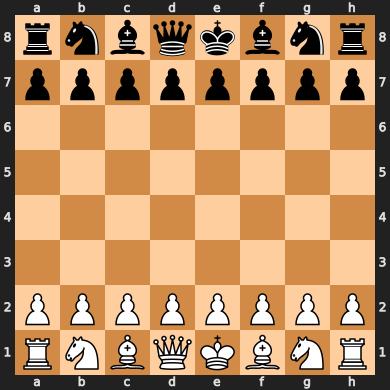

In [65]:
board

In [ ]:
# for game_number in range(1, NUM_GAMES + 1):
#     print(f"Starting game {game_number}...")
#     move_counter = 0
#     board = chess.Board()

#     while not board.is_game_over() and move_counter <= 500:
#         stockfish.set_fen_position(board.fen())

#         move = stockfish.get_best_move_time(200)

#         if move is None:
#             print("Stockfish failed to provide a move\n")
#             continue

#         board.push_uci(move)

#         move_counter += 1

#     # Record the result of the game
#     result = board.result()
#     if result == "1-0":
#         white_wins += 1
#     elif result == "0-1":
#         black_wins += 1
#     else:
#         draws += 1
    

#     results.append({
#         "Game Number": game_number,
#         "Result": result
#         })

#     print(f"Game {game_number} result: {result} Move_counter: {move_counter}\n")

In [78]:
results.append({
            "White Wins": white_wins,
            "Black Wins": black_wins,
            "Draws": draws,
        })

print(results)

[{'Game Number': 1, 'Result': '1-0'}, {'Game Number': 2, 'Result': '1/2-1/2'}, {'Game Number': 3, 'Result': '1/2-1/2'}, {'Game Number': 4, 'Result': '1-0'}, {'Game Number': 5, 'Result': '1/2-1/2'}, {'Game Number': 6, 'Result': '1/2-1/2'}, {'Game Number': 7, 'Result': '1/2-1/2'}, {'Game Number': 8, 'Result': '1/2-1/2'}, {'Game Number': 9, 'Result': '1/2-1/2'}, {'Game Number': 10, 'Result': '1/2-1/2'}, {'Game Number': 11, 'Result': '1/2-1/2'}, {'Game Number': 12, 'Result': '1/2-1/2'}, {'Game Number': 13, 'Result': '1/2-1/2'}, {'Game Number': 14, 'Result': '1/2-1/2'}, {'Game Number': 15, 'Result': '1/2-1/2'}, {'Game Number': 16, 'Result': '1-0'}, {'Game Number': 17, 'Result': '1/2-1/2'}, {'Game Number': 18, 'Result': '1/2-1/2'}, {'Game Number': 19, 'Result': '1/2-1/2'}, {'Game Number': 20, 'Result': '1-0'}, {'Game Number': 21, 'Result': '1/2-1/2'}, {'Game Number': 22, 'Result': '1/2-1/2'}, {'Game Number': 23, 'Result': '1/2-1/2'}, {'Game Number': 24, 'Result': '1-0'}, {'Game Number': 25, 

In [79]:
df = pd.DataFrame(results)
df.to_csv("Stockfish_vs_Stockfish_sameELO.csv", index=False)
print("Results saved to Stockfish_vs_Stockfish_sameELO.csv")

Results saved to Stockfish_vs_Stockfish_sameELO.csv
